In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DS - Assignment Part 1 data set.xlsx to DS - Assignment Part 1 data set.xlsx


In [3]:
house=pd.read_excel( 'DS - Assignment Part 1 data set.xlsx')
house.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
#checking for null values
house.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

There are no null values in the dataset.

In [6]:
#descriptive statistics
house.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


The mean and median are almost same in case of all the features hence data might follow normal distribution.

In [7]:
#checking if data types match with the values
house.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [8]:
#checking for duplicates
house[house.duplicated()]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area


There are no duplicate values in the data.

In [9]:
house.shape

(414, 9)

In [10]:
house = house.rename({'Transaction date':'date', 'House Age':'age', 'Distance from nearest Metro station (km)':'distance', 'Number of convenience stores':'stores', 
                      'latitude':'latitude','longitude':'longitude', 'Number of bedrooms':'bedrooms', 'House size (sqft)':'size','House price of unit area':'price'}, axis=1)
house.head()

,date,age,distance,stores,latitude,longitude,bedrooms,size,price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [11]:
#Collinearity Problem Check
#By Calculating VIF

import statsmodels.formula.api as smf
rsq_age=smf.ols('age~date+distance+stores+latitude+longitude+bedrooms+size',data=house).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_date=smf.ols('date~age+distance+stores+latitude+longitude+bedrooms+size',data=house).fit().rsquared
vif_date=1/(1-rsq_date)

rsq_dist=smf.ols('distance~date+age+stores+latitude+longitude+bedrooms+size',data=house).fit().rsquared
vif_dist=1/(1-rsq_dist)

rsq_stores=smf.ols('stores~date+age+distance+latitude+longitude+bedrooms+size',data=house).fit().rsquared
vif_stores=1/(1-rsq_stores)

rsq_lat=smf.ols('latitude~date+age+distance+stores+longitude+bedrooms+size',data=house).fit().rsquared
vif_lat=1/(1-rsq_lat)

rsq_long=smf.ols('longitude~date+age+distance+stores+latitude+bedrooms+size',data=house).fit().rsquared
vif_long=1/(1-rsq_long)

rsq_bed=smf.ols('bedrooms~date+age+distance+stores+latitude+longitude+size',data=house).fit().rsquared
vif_bed=1/(1-rsq_bed)

rsq_size=smf.ols('size~date+age+distance+stores+latitude+longitude+bedrooms',data=house).fit().rsquared
vif_size=1/(1-rsq_size)

# Putting the values in Dataframe format
d1={'Variables':['age','date','dist','stores','lat','long','bed','size'],
    'Vif':[vif_age,vif_date,vif_dist,vif_stores,vif_lat,vif_long,vif_bed,vif_size]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,age,1.022561
1,date,1.019265
2,dist,4.347713
3,stores,1.620685
4,lat,1.613218
5,long,2.928265
6,bed,2.327637
7,size,2.339737


Sice vif < 20, for all variables, No collinearity found among independent variables

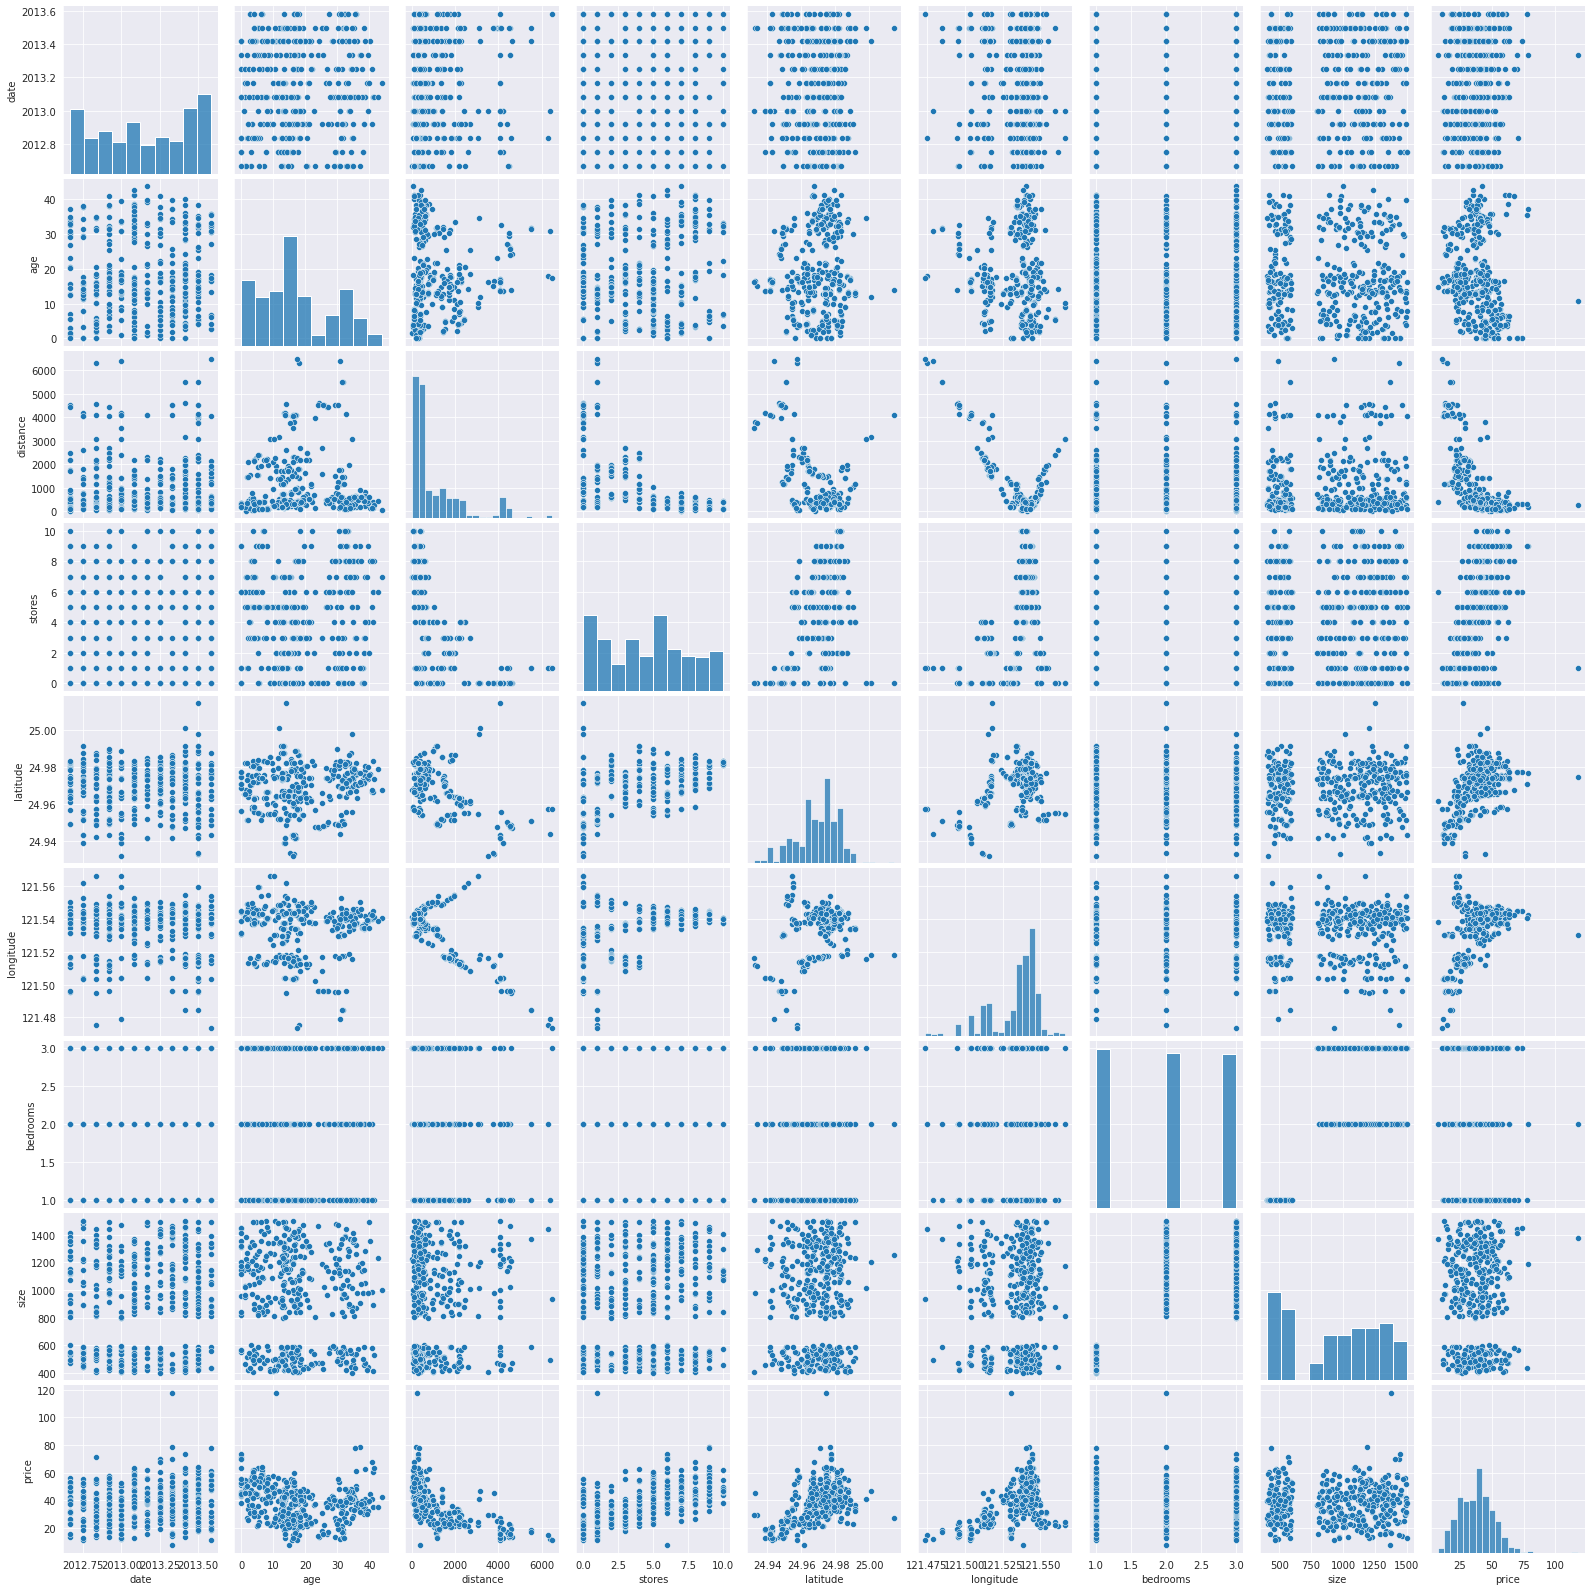

In [12]:
#plotting pairwise relationships between variables within a dataset
sns.set_style(style='darkgrid')
sns.pairplot(house)

In [43]:
#checking the relationship between price and date
mod=smf.ols('price~date',data=house).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.181
Date:                Thu, 24 Nov 2022   Prob (F-statistic):             0.0752
Time:                        07:30:05   Log-Likelihood:                -1666.1
No. Observations:                 414   AIC:                             3336.
Df Residuals:                     412   BIC:                             3344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8464.2595   4767.178     -1.776      0.077   -1.78e+04     906.766
date           4.2234      2.368      1.783      0.075      -0.432       8.878
==============================================================================
Omnibus:                       43.005   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.351
Skew:                           0.568   Prob(JB):                     8.84e-21
Kurtosis:                       5.016   Cond. No.                     1.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since date does not have much effect on the dependent(price) variable, we will remove it from our model.

In [44]:
#removing date from the dataset
mod1=house.drop('date',axis=1)
mod1.columns

Index(['age', 'distance', 'stores', 'latitude', 'longitude', 'bedrooms',
       'size', 'price'],
      dtype='object')

In [55]:
#fitting a model
model = smf.ols('price~age+distance+stores+latitude+longitude+bedrooms+size',data=mod1).fit()
model.params

Intercept   -4816.927321
age            -0.266957
distance       -0.004288
stores          1.157349
latitude      236.489938
longitude      -8.606675
bedrooms       -0.166310
size            0.001020
dtype: float64

In [56]:
#t-values and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept   -0.773514
age         -6.804524
distance    -5.898826
stores       6.064556
latitude     5.245049
longitude   -0.174699
bedrooms    -0.202002
size         0.526517
dtype: float64 
 Intercept    4.396685e-01
age          3.650316e-11
distance     7.720313e-09
stores       3.030464e-09
latitude     2.520665e-07
longitude    8.614034e-01
bedrooms     8.400163e-01
size         5.988165e-01
dtype: float64


In [57]:
print('R2 =',model.rsquared*100, '\n'
      'R2 Adj. = ',model.rsquared_adj*100)

R2 = 57.1547419606003 
R2 Adj. =  56.41603061509342


The Accuracy of the model is 57%. Further we will carry out the required analysis to improve the model.

In [58]:
# Model Deleting Diagnostics (detecting outliers and influencer)
#Cook's Distance

from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

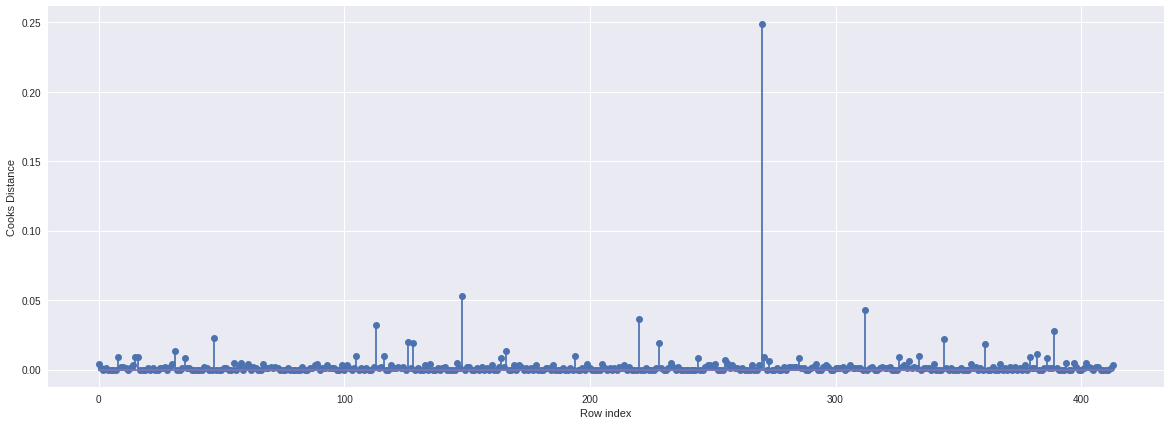

In [59]:
#Plot the influencers values using stem plot
import matplotlib.pyplot as plt
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(mod1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
#index of the data points where c is more than .15
(np.argmax(c),np.max(c))

(270, 0.2490997162888073)

In [61]:
#finding the leverage cutoff
k = house.shape[1]
n = house.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.07246376811594203

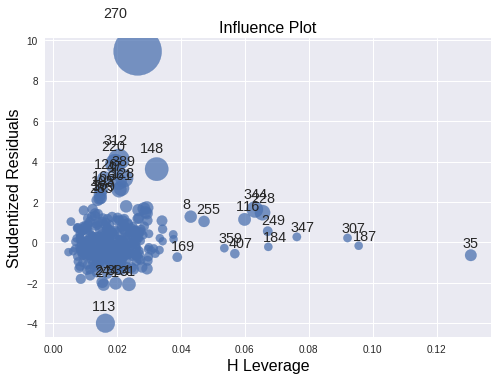

In [68]:
#influence plot
from statsmodels.graphics.regressionplots import influence_plot
plt.style.use('seaborn')

influence_plot(model,alhpa=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

 From the above plot, it is evident that data point 270 is the influencer


In [69]:
#Discard the data points which are influencers and re-asign the row number (reset_index())
house_1=mod1.drop(mod1.index[[270]],axis=0).reset_index()
house_1.shape

(413, 9)

In [70]:
house_1.columns

Index(['index', 'age', 'distance', 'stores', 'latitude', 'longitude',
       'bedrooms', 'size', 'price'],
      dtype='object')

In [71]:
#Drop the original index
house_1=house_1.drop(['index'],axis=1)
house_1.shape

(413, 8)

In [72]:
#Building the Model again
model_1= smf.ols('price~age+distance+stores+latitude+longitude+bedrooms+size',data = house_1).fit()
print('R2 =',model_1.rsquared*100, '\n'
      'R2 Adj. = ',model_1.rsquared_adj*100)

R2 = 61.720352277765066 
R2 Adj. =  61.058728736886934


The Acuuracy of the model has improved to 61%.

In [73]:
#Cook's Distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence_1 = model_1.get_influence()
(c, _) = model_influence_1.cooks_distance

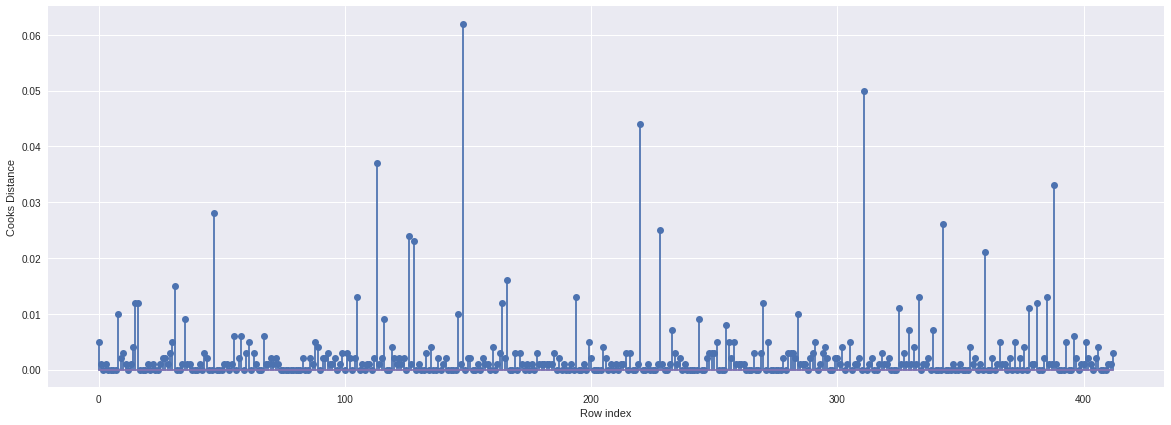

In [74]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(house_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
#leverage cutoff
k = house_1.shape[1]
n = house_1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.06537530266343825

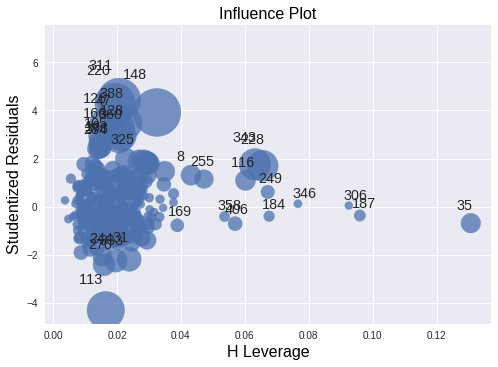

In [76]:
plt.style.use('seaborn')
influence_plot(model_1,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

From the above plot, it is evident that data point 148 and 311 is the influencer

In [77]:
#Discard the data points which are influencers and re-asign the row number (reset_index())
house_2=house_1.drop(house_1.index[[148,311]],axis=0).reset_index()
house_2.shape

(411, 9)

In [78]:
#Drop the original index
house_2=house_2.drop(['index'],axis=1)
house_2.columns

Index(['age', 'distance', 'stores', 'latitude', 'longitude', 'bedrooms',
       'size', 'price'],
      dtype='object')

In [80]:
model_2= smf.ols('price~age+distance+stores+latitude+longitude+bedrooms+size',data = house_2).fit()
print('R2 =',model_2.rsquared*100, '\n'
      'R2 Adj. = ',model_2.rsquared_adj*100)

R2 = 64.04870395074525 
R2 Adj. =  63.42423975137854


Now the accuracy of the model has imporved to 64%.

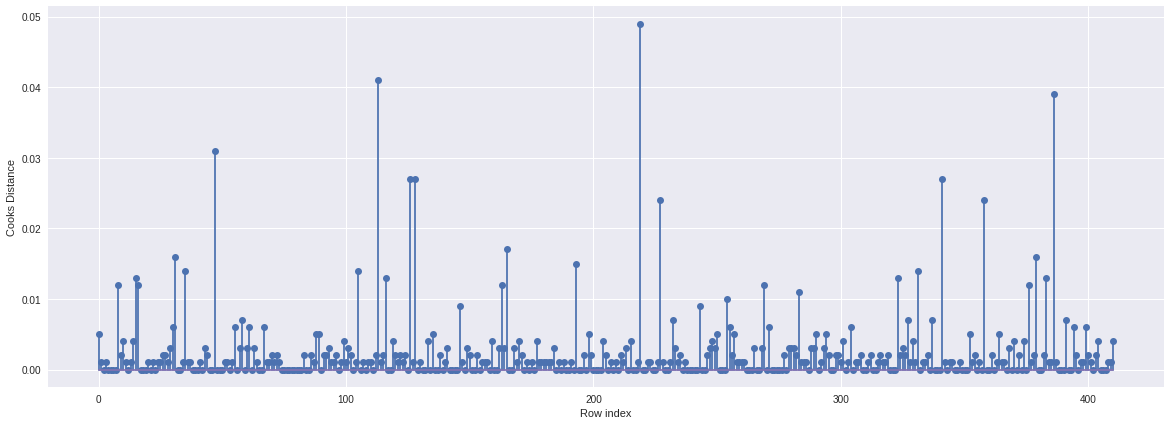

In [81]:
#Cooks Distance
model_influence_2 = model_2.get_influence()
(c, _) = model_influence_2.cooks_distance
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(house_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [82]:
k = house_2.shape[1]
n = house_2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.06569343065693431

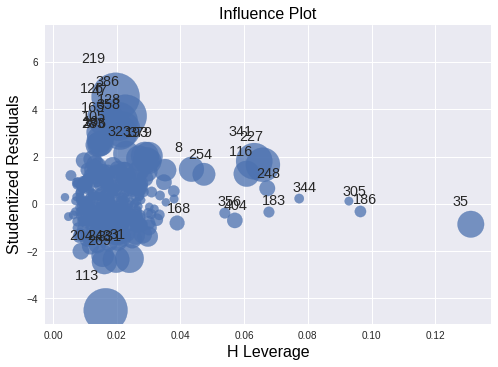

In [83]:
plt.style.use('seaborn')
influence_plot(model_2,alhpa=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

From the graph we can notice that datapoint 113 and 219 have large influence, hence we can remove them.

In [84]:
#Discard the data points which are influencers and reasign the row number (reset_index())
house_3=house_2.drop(house_2.index[[113,219]],axis=0).reset_index()
house_3.shape

(409, 9)

In [85]:
#Drop the original index
house_3=house_3.drop(['index'],axis=1)
house_3.columns

Index(['age', 'distance', 'stores', 'latitude', 'longitude', 'bedrooms',
       'size', 'price'],
      dtype='object')

In [86]:
#Final Model
model_3= smf.ols('price~age+distance+stores+latitude+longitude+bedrooms+size',data = house_3).fit()
print('R2 =',model_3.rsquared*100, '\n'
      'R2 Adj. = ',model_3.rsquared_adj*100)

R2 = 66.22438404079377 
R2 Adj. =  65.63478475971036


Therefore our model explains 66% of the dependent variable

In [88]:
#Predecting the new data
#New data for prediction  
new_data=pd.DataFrame({'age':32,'distance':84.87,'stores':10,'latitude':24.98,'longitude':121.54,'bedrooms':1,'size':575}, index=[1])

In [89]:
pred_y = model_3.predict(new_data)
pred_y

1    47.248163
dtype: float64

In [90]:
# Automatic Prediction of Price for original(given) data
pred_y=model_3.predict(mod1)
pred_y

0      47.978833
1      49.073414
2      46.761887
3      46.642127
4      47.502880
         ...    
409    14.970908
410    52.465114
411    45.943279
412    44.675565
413    52.149623
Length: 414, dtype: float64